# Customer Churn Prediction with Feature Selection

## About the dataset
We will be using a telecommunications dataset for predicting customer churn with feature selection. Our goal is to find a model that is able to maintain high accuracy while not overfitting to noise. This is a historical customer dataset where each row represents one customer. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.
This data set provides information to help us predict what behavior will help you to retain customers. We can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

You can find the dataset [here](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv).

# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is D816-28B0

 Directory of C:\Users\luigi\Data_science_practice\Customer_Churn_Feature_Selection

07/10/2020  12:51 PM    <DIR>          .
07/10/2020  12:51 PM    <DIR>          ..
07/09/2020  12:02 PM    <DIR>          .ipynb_checkpoints
05/20/2020  11:30 AM            36,144 ChurnData.csv
07/10/2020  12:51 PM           461,084 Feature_selection.ipynb
07/09/2020  12:00 PM               141 README.md
               3 File(s)        497,369 bytes
               3 Dir(s)   2,238,193,664 bytes free


# Load Data From CSV File

In [3]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [5]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [6]:
churn_df.isnull().any()

tenure      False
age         False
address     False
income      False
ed          False
employ      False
equip       False
callcard    False
wireless    False
longmon     False
tollmon     False
equipmon    False
cardmon     False
wiremon     False
longten     False
tollten     False
cardten     False
voice       False
pager       False
internet    False
callwait    False
confer      False
ebill       False
loglong     False
logtoll     False
lninc       False
custcat     False
churn       False
dtype: bool

There are 3 things that take my attention: 

1) All the features are numerical so can be used for feature selection 

2) Churn is our class label 

3) Feature don't includes NaN

# Lets define features (X), and target (y) variables for our dataset:

In [7]:
# Convert target variable to integer for sklearn algorithm
churn_df['churn'] = churn_df['churn'].astype('int')

In [8]:
# y includes our labels and x includes our features
y = churn_df['churn']                          # 1 or 0 

x = churn_df.drop('churn', axis = 1)
x.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0


In [9]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int32

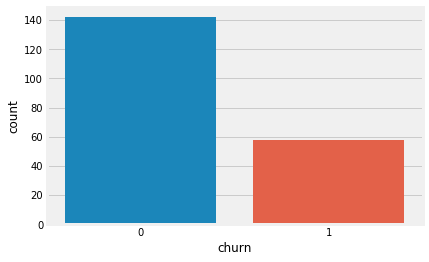

In [10]:
ax = sns.countplot(y, label="Count")

In [11]:
Staying, Leaving = y.value_counts()
print('Number of Customers Leaving: ',Leaving)
print('Number of Customers Staying : ',Staying)

Number of Customers Leaving:  58
Number of Customers Staying :  142


In [12]:
x.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.295000,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.457187,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000


# Data Normalization

In order to visualize the feature we need to normalize the data. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

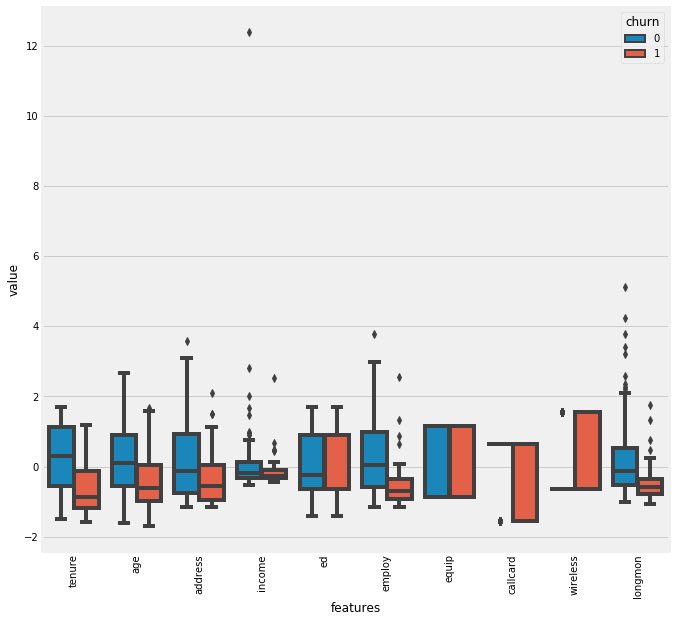

In [13]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="churn",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="churn", data=data)
plt.xticks(rotation=90)

Some of the features from the plot look quite similar so I decide to check the correlation and drop those features if the correlation is > 0.9.

# Feature selection using correlation

Check correlation between features using heatmap.

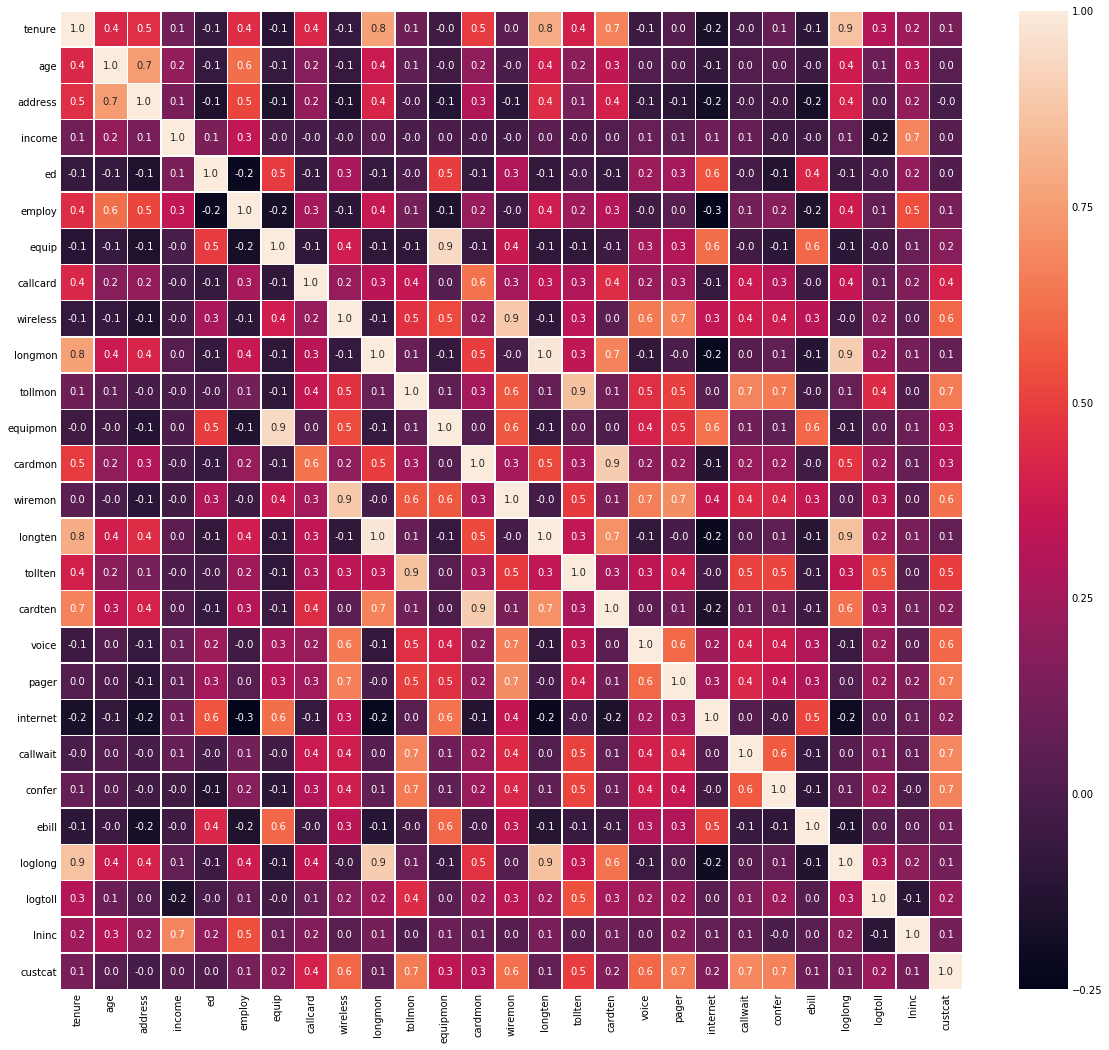

In [14]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [15]:
# Define threshold
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = x.corr().abs()
corr_matrix.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
tenure,1.000000,0.431802,0.456328,0.109383,0.070503,0.445755,0.117102,0.426530,0.070590,0.763134,...,0.050686,0.018791,0.164921,0.009747,0.080650,0.099128,0.864388,0.310045,0.246353,0.134237
age,0.431802,1.000000,0.746566,0.211275,0.071509,0.622553,0.071357,0.170404,0.065527,0.373547,...,0.019555,0.006803,0.078395,0.020002,0.030625,0.048279,0.379413,0.093600,0.313359,0.041055
address,0.456328,0.746566,1.000000,0.132807,0.145550,0.520926,0.148977,0.209204,0.146478,0.421782,...,0.069627,0.105812,0.191058,0.019967,0.030494,0.172171,0.409357,0.018386,0.212929,0.016841
income,0.109383,0.211275,0.132807,1.000000,0.141241,0.345161,0.010741,0.019969,0.029635,0.041808,...,0.085525,0.056977,0.102809,0.081133,0.031556,0.041392,0.065595,0.156498,0.680313,0.030725
ed,0.070503,0.071509,0.145550,0.141241,1.000000,0.213886,0.488041,0.071178,0.267670,0.072735,...,0.233628,0.258698,0.552996,0.016247,0.132215,0.427315,0.054581,0.007227,0.206718,0.013127


In [16]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
tenure,NaN,0.431802,0.456328,0.109383,0.070503,0.445755,0.117102,0.426530,0.070590,0.763134,...,0.050686,0.018791,0.164921,0.009747,0.080650,0.099128,0.864388,0.310045,0.246353,0.134237
age,NaN,NaN,0.746566,0.211275,0.071509,0.622553,0.071357,0.170404,0.065527,0.373547,...,0.019555,0.006803,0.078395,0.020002,0.030625,0.048279,0.379413,0.093600,0.313359,0.041055
address,NaN,NaN,NaN,0.132807,0.145550,0.520926,0.148977,0.209204,0.146478,0.421782,...,0.069627,0.105812,0.191058,0.019967,0.030494,0.172171,0.409357,0.018386,0.212929,0.016841
income,NaN,NaN,NaN,NaN,0.141241,0.345161,0.010741,0.019969,0.029635,0.041808,...,0.085525,0.056977,0.102809,0.081133,0.031556,0.041392,0.065595,0.156498,0.680313,0.030725
ed,NaN,NaN,NaN,NaN,NaN,0.213886,0.488041,0.071178,0.267670,0.072735,...,0.233628,0.258698,0.552996,0.016247,0.132215,0.427315,0.054581,0.007227,0.206718,0.013127


In [17]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 3 columns to remove.


Drop features

In [18]:
x = x.drop(columns = to_drop)
y = y.drop(columns = to_drop)

print('Training shape: ', x.shape)
print('Testing shape: ', y.shape)

Training shape:  (200, 24)
Testing shape:  (200,)


# Fit Random Forest

Accuracy is:  0.7166666666666667


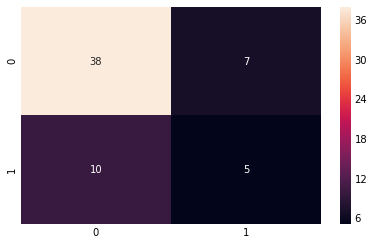

In [19]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=3)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d");

After fitting Random Forest we can see accuracy is 72%.

# SelectKBest

Removes all but the k highest scoring features.

In [20]:
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [21]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [2.13648784e+02 6.07453944e+01 7.72270729e+01 1.08763483e+02
 7.63854319e+00 1.63392314e+02 5.42876512e+00 3.74545153e+00
 2.14895055e+00 9.32194799e+01 9.32415902e-02 3.87249719e+01
 1.27999090e+02 6.32283022e+02 6.87403022e+03 6.59880996e-01
 6.70519502e-01 8.11602753e+00 1.04339487e+00 1.35938624e+00
 6.61165110e+00 2.56405425e-02 2.62317618e-01 1.05496438e-01]
Feature list: Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'cardmon', 'wiremon',
       'tollten', 'cardten', 'voice', 'pager', 'internet', 'callwait',
       'confer', 'ebill', 'logtoll', 'lninc', 'custcat'],
      dtype='object')


Top features are : cardten, ed, tenure, income, employ.

So let's use them:

Accuracy is:  0.75


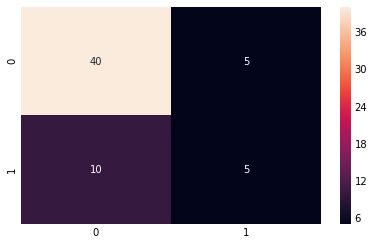

In [22]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Although we use 5 features in selectkBest method, accuracy improved by 8% from the previous model.

# RFE

It uses one a classification method (random forest in our case), and assigns a weight to each of features. The smaller weights are then removed from the current set features. That procedure is recursively repeated until it hits the desired number of features.

In [23]:
# Create the RFE object and rank features
clf_rf_3 = RandomForestClassifier()     
# Select 5 top features
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [24]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['tenure', 'age', 'employ', 'longmon', 'lninc'], dtype='object')


Features selected using this method are slighly different than before.

# RFE with validation and Random Forest

We apply validationto select the best features but also how many features we need for best accuracy.

In [25]:
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 24
Best features : Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'cardmon', 'wiremon',
       'tollten', 'cardten', 'voice', 'pager', 'internet', 'callwait',
       'confer', 'ebill', 'logtoll', 'lninc', 'custcat'],
      dtype='object')


Optimal number of features : 24

Let's plot accuracy:

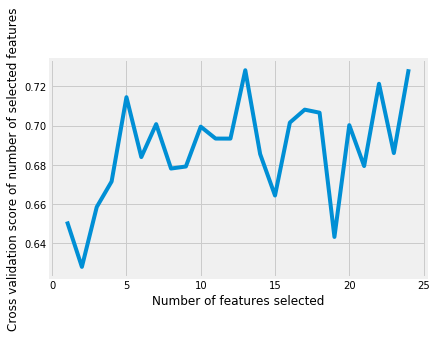

In [26]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

From the plot we can see accuracy for 8 features it's pretty similar to 24.

# Feature importances attributes Random Forest

Feature ranking:
1. feature 5 (0.139361)
2. feature 1 (0.101441)
3. feature 9 (0.083463)
4. feature 0 (0.065477)
5. feature 3 (0.061482)
6. feature 14 (0.055780)
7. feature 20 (0.051109)
8. feature 21 (0.049206)
9. feature 22 (0.046486)
10. feature 4 (0.045594)
11. feature 13 (0.039343)
12. feature 11 (0.034935)
13. feature 10 (0.034312)
14. feature 23 (0.033379)
15. feature 17 (0.030321)
16. feature 2 (0.028643)
17. feature 7 (0.025763)
18. feature 12 (0.024363)
19. feature 6 (0.018528)
20. feature 18 (0.009284)
21. feature 15 (0.008744)
22. feature 8 (0.006823)
23. feature 19 (0.006163)
24. feature 16 (0.000000)


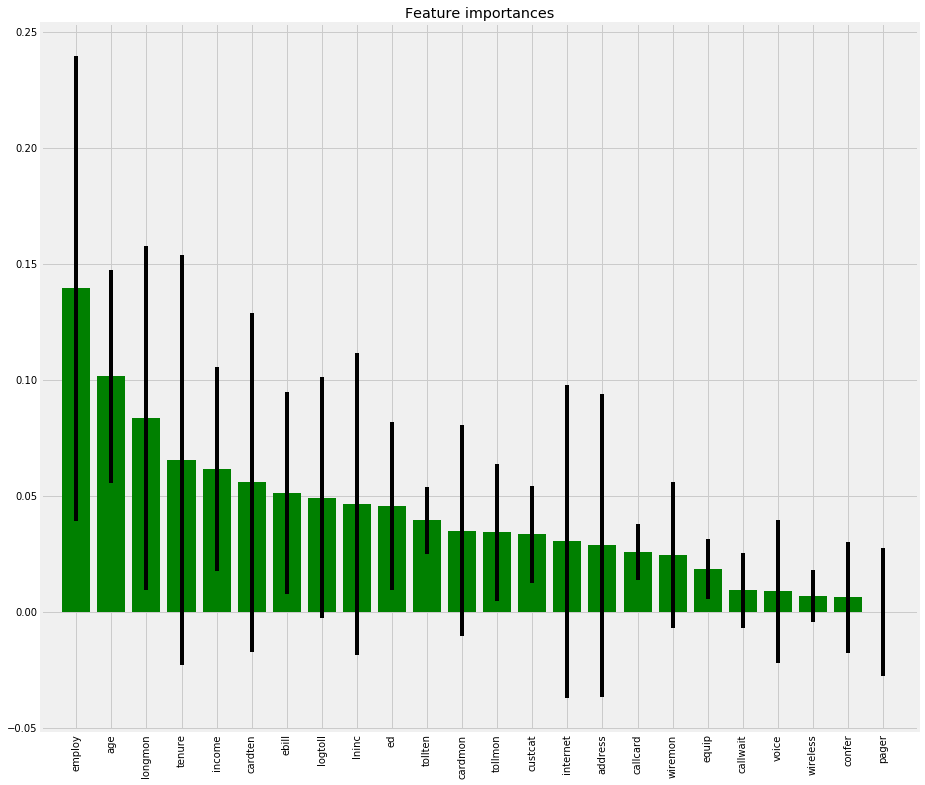

In [27]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

Let's manually define a dataframe with 5 top features. This dataframe can be changed using different columns instead on the ones used and also adding or removing them.

In [31]:
df5 = churn_df[['employ', 'age', 'longmon', 'tenure', 'income', 'churn']]
df5.head()

,employ,age,longmon,tenure,income,churn
0,5.0,33.0,4.40,11.0,136.0,1
1,0.0,33.0,9.45,33.0,33.0,1
2,2.0,30.0,6.30,23.0,30.0,0
3,10.0,35.0,6.05,38.0,76.0,0
4,15.0,35.0,7.10,7.0,80.0,0


In [32]:
# y includes our labels and x includes our features
y = df5['churn']   # 1 or 0 

x = df5.drop('churn', axis = 1)
x.head()

,employ,age,longmon,tenure,income
0,5.0,33.0,4.40,11.0,136.0
1,0.0,33.0,9.45,33.0,33.0
2,2.0,30.0,6.30,23.0,30.0
3,10.0,35.0,6.05,38.0,76.0
4,15.0,35.0,7.10,7.0,80.0


Accuracy is:  0.8


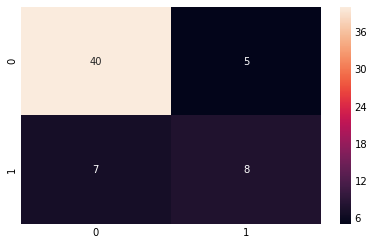

In [33]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=3)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d");

Feature importances it's less able in this case on finding the optimal features. In fact accuracy decreases by 10% circa.

# Results

As we saw for feature selection there is no a best one in general. It is important to understand the dataset we are working with, the input and output variables and trying several methods. 

Here we can see the top 5 most important features for each different feature selection method:

| SelectKBest   |      RFE      |  Random Forest |
|----------|-------------|------|
| cardten |  tenure | employ |
| ed |    age   |   age |
| tenure | employ |   longmon |
| income    |     longmon          |  tenure     |
| employ      |         lninc      |  income     |

In our care default data included 27 features but after using SelectKBest from feature_selection we drop this number from 27 to 5 improving accuracy by 8% circa. 